### 학습관련기술들   
- 가중치 감소를 적용한 신경망으로 학습 및 테스트를 구현하자
- 오버피팅(Over-fitting)
    + 훈련 데이터에만 너무 적응해 버려서 시험데이터에 제대로 대응하지 못하는 현상
    + 매개변수에 비해 상대적으로 훈련 데이터 수가 적을때 발생함
- 가중치 감소(Weight decay)
    + 오버피팅 억제 방법
    + 학습과정에서 큰 가중치에 대해서는 그에 상응하는 큰 패널티를 부여한다.

In [ ]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

3.0
epoch: 0, train acc: 0.08, test acc: 0.0942
epoch: 1, train acc: 0.08333333333333333, test acc: 0.0942
epoch: 2, train acc: 0.08, test acc: 0.0952
epoch: 3, train acc: 0.08, test acc: 0.0947
epoch: 4, train acc: 0.08, test acc: 0.0941
epoch: 5, train acc: 0.09333333333333334, test acc: 0.0983
epoch: 6, train acc: 0.11, test acc: 0.1048
epoch: 7, train acc: 0.15333333333333332, test acc: 0.1184
epoch: 8, train acc: 0.18, test acc: 0.1323
epoch: 9, train acc: 0.25, test acc: 0.156
epoch: 10, train acc: 0.31, test acc: 0.1834
epoch: 11, train acc: 0.37, test acc: 0.205
epoch: 12, train acc: 0.4066666666666667, test acc: 0.2254
epoch: 13, train acc: 0.41333333333333333, test acc: 0.2508
epoch: 14, train acc: 0.44, test acc: 0.2696
epoch: 15, train acc: 0.45666666666666667, test acc: 0.2918
epoch: 16, train acc: 0.48, test acc: 0.3091
epoch: 17, train acc: 0.49333333333333335, test acc: 0.3256
epoch: 18, train acc: 0.5133333333333333, test acc: 0.3448
epoch: 19, train acc: 0.52333333333

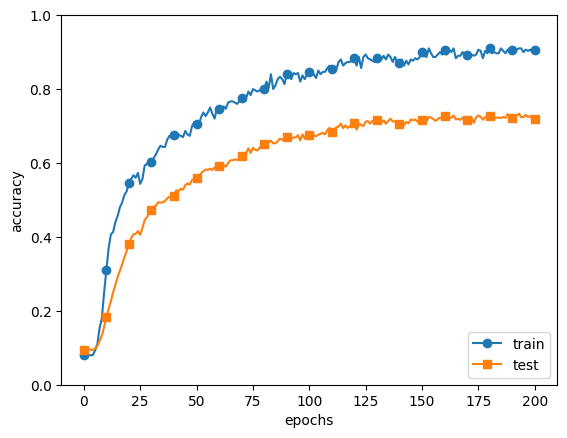

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임(300개로)
x_train = x_train[:300]
t_train = t_train[:300]

# =================================
# weight decay (가중치 감쇠) 설정
# L(w)=Loss(y,f(x;w))+λ∑∣∣w∣∣2
#
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# =================================

networks = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                        output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

# print(iter_per_epoch)
for i in range(1000000000) :
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기를 구하고 가중치 업데이트
    grads = networks.gradient(x_batch, t_batch)
    optimizer.update(networks.params, grads)

    # 1주기당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = networks.accuracy(x_train, t_train)
        test_acc = networks.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(f"epoch: {str(epoch_cnt)}, train acc: {str(train_acc)}, test acc: {str(test_acc)}")
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

markers = {"train": "o", "test": "s"}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()